In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
import sys
!{sys.executable} -m pip install xlrd

You should consider upgrading via the 'c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
ARQUIVO_XPS_EXCEL = "ID_xps.xls"
NOME_DA_PLANILHA = "O1s Scan"
LINHA_CABECALHO = 15  # considerando que a 1a linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 2] # considerando que a 1a coluna é a número 0

df = pd.read_excel(
    ARQUIVO_XPS_EXCEL,
    sheet_name=NOME_DA_PLANILHA,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df = df.dropna()

In [6]:
logic = df["eV"] <= 538
df = df.loc[logic]

In [14]:
logic = df["eV"] <= 530
valor_medio_y_entre_524_e_526 = df["Counts / s"].loc[logic].mean()
novo_valor_y = df["Counts / s"].values - valor_medio_y_entre_524_e_526
df["Counts / s"] = novo_valor_y

#df.plot("eV", "Counts / s")
#plt.show()

In [8]:
from lmfit.models import GaussianModel

modelo = GaussianModel()
dados_x = df["eV"].values
dados_y = df["Counts / s"].values

params = modelo.guess(dados_y, x=dados_x)
resultado_fit = modelo.fit(dados_y, params, x=dados_x)

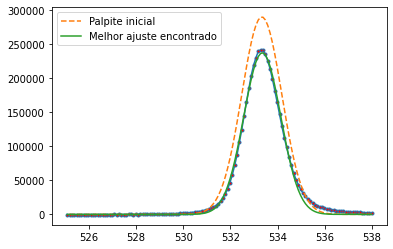

In [9]:
plt.plot(dados_x, dados_y, marker="o", markerfacecolor="red", markersize=3)
plt.plot(dados_x, resultado_fit.init_fit, "--", label="Palpite inicial")
plt.plot(dados_x, resultado_fit.best_fit, "-", label="Melhor ajuste encontrado")
plt.legend()
plt.show()

In [13]:
#print(resultado_fit.fit_report())

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

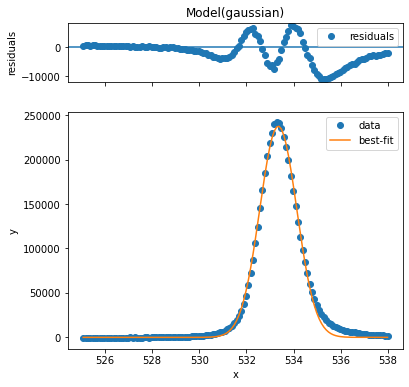

In [11]:
params = modelo.make_params(amplitude= 2500000, center=535, sigma=1)
resultado_fit = modelo.fit(dados_y, params, x=dados_x)
resultado_fit.plot()

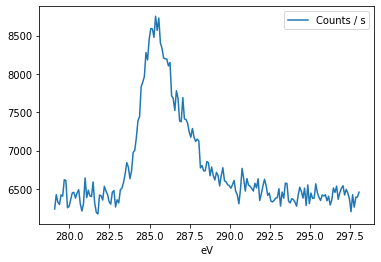

In [16]:
ARQUIVO_XPS_EXCEL = "ID_xps.xls"
NOME_DA_PLANILHA = "C1s Scan"
LINHA_CABECALHO = 15  # considerando que a 1a linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 2] # considerando que a 1a coluna é a número 0

df1 = pd.read_excel(
    ARQUIVO_XPS_EXCEL,
    sheet_name=NOME_DA_PLANILHA,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df1 = df1.dropna()
df1.plot("eV", "Counts / s")
plt.show()

In [17]:
logic = df1["eV"] <= 282.5
df1 = df1.loc[logic]

In [ ]:
logic = df1["eV"] <= 530
medy = df1["Counts / s"].loc[logic].mean()
novo_valor_y = df["Counts / s"].values - medy
df["Counts / s"] = novo_valor_y

#df.plot("eV", "Counts / s")
#plt.show()